In [1]:
import src2
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [2]:
file_query = "0003"
file_key = "0002"

input_folder_name = 'ISRwall/input/'


data_query = scipy.io.loadmat(input_folder_name + f"kp_{file_query}" + '.mat')
data_key = scipy.io.loadmat(input_folder_name + f"kp_{file_key}" + '.mat')

data_query_desc = data_query['desc']
data_query_kp = data_query['kp']

data_key_desc = data_key['desc']
data_key_kp = data_key['kp']

print(data_query_desc.shape)
print(data_query_kp.shape)
print(data_key_desc.shape)
print(data_key_kp.shape)

(6394, 64)
(6394, 2)
(6808, 64)
(6808, 2)


In [3]:
matches = src2.knn_match_vectorized(data_query_desc, data_key_desc, k=2)
good_matches = src2.ratio_test(matches, ratio=0.25)

idx_query_vec = np.array([match.queryIdx for match in good_matches])
idx_key_vec = np.array([match.trainIdx for match in good_matches])

query_kp = data_query_kp[idx_query_vec, :].astype(np.uint16)
key_kp = data_key_kp[idx_key_vec, :].astype(np.uint16)

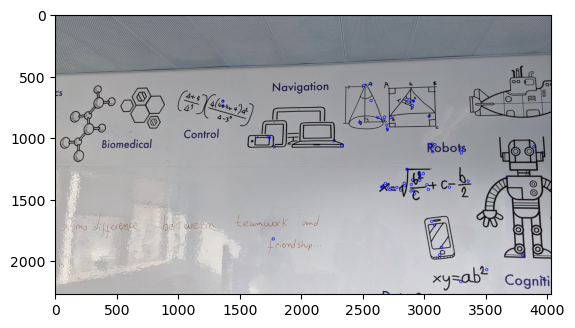

In [4]:
## add the keypoint to the image
import cv2

img_query = plt.imread(input_folder_name + f"img_{file_query}" + '.jpg')

img_query_rgb = cv2.cvtColor(img_query, cv2.COLOR_BGR2RGB)

for kp in query_kp:
    cv2.circle(img_query_rgb, (kp[0], kp[1]), 10, (0, 0, 255), 3)

    
plt.imshow(img_query_rgb)
plt.show()



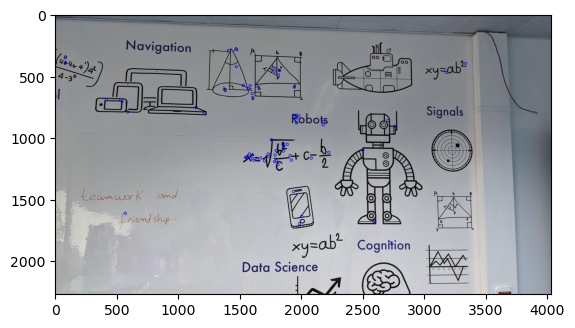

In [5]:
## add the keypoint to the image
import cv2

img_key = plt.imread(input_folder_name + f"img_{file_key}" + '.jpg')

img_key_rgb = cv2.cvtColor(img_key, cv2.COLOR_BGR2RGB)

for kp in key_kp:
    cv2.circle(img_key_rgb, (kp[0], kp[1]), 10, (0, 0, 255), 3)

    
plt.imshow(img_key_rgb)
plt.show()